In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from numpy.ma import masked
import sys
from clevar.match import output_matched_catalog

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/"
am = ClCatalog.read(inpath + 'c1_p_ls3814z115.fits','c1', full = True)
rm = ClCatalog.read(inpath + 'c2_p_ls3814z115.fits','c2', full = True)

In [3]:
am_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/Catalog_members_ls38z115.fits'

rm_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/RedMapper/Catalog_members_ls14.fits'
#cdc_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/cosmoDC2_v1.1.4_small/m13/Catalog_members.fits"

In [4]:
am_mb = Table.read(am_inpath)
rm_mb = Table.read(rm_inpath)
#cdc_mb = Table.read(cdc_inpath)

In [5]:
output_matched_catalog(inpath + 'c1_p_ls3814z115.fits', inpath + 'c2_p_ls3814z115.fits', inpath + 'output_catalog_p_ls3814z115.fits', am, rm, matching_type='cross', overwrite = True)

In [6]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/"
c_merged12 = Table.read(inpath + 'output_catalog_p_ls3814z115.fits')

In [7]:
c_merged12

cat1_id,cat1_ra,cat1_dec,cat1_z,cat1_mass,cat1_mt_self,cat1_mt_other,cat1_mt_multi_self,cat1_mt_multi_other,cat1_mt_cross,cat2_id,cat2_ra,cat2_dec,cat2_z,cat2_mass,cat2_z_true,cat2_log_mass,cat2_mt_self,cat2_mt_other,cat2_mt_multi_self,cat2_mt_multi_other,cat2_mt_cross
bytes11,float64,float64,float32,float64,bytes5,bytes5,bytes14,bytes14,bytes5,bytes11,float64,float64,float32,float32,float32,float64,bytes6,bytes6,bytes20,bytes20,bytes6
1,50.113525,-40.03647,0.44,75.694496,416,416,416,416,416,416,50.0986812400157,-40.041193422095496,0.43517646,56.905266,0.4322221,1.7551524639129639,1,1,1,1,1
2,50.642569,-41.402661,0.2,62.659902,449,449,449,449,449,449,50.642098246561304,-41.40092456771352,0.19257621,54.03733,0.19309519,1.7326939105987549,2,2,2,2,2
3,50.421896,-39.587457,0.39,48.460455,1575,1575,1575,1575,1575,1575,50.42203362588924,-39.587746579168694,0.39265478,33.488884,0.38855246,1.5249006748199463,3,3,3,3,3
4,50.603551,-39.582656,1.1,118.29114,79,79,79,79,79,79,50.601945314584675,-39.584667514262556,1.0827233,81.099655,1.0862333,1.9090189933776855,4,4,4,4,4
5,50.577077,-40.162645,0.59,72.90131,471,471,471,471,471,471,50.57622204392435,-40.161587068873025,0.585211,60.45968,0.5825961,1.7814658880233765,5,5,5,5,5
6,51.048368,-41.281951,0.79,79.642977,781,781,781,781,781,781,51.04846444718309,-41.26482347006931,0.7745975,41.63504,0.7753187,1.6194590330123901,6,6,6,6,6
9,51.576131,-40.01887,0.61,55.388537,1704,1704,1704,1704,1704,1704,51.57638580775331,-40.02086515625286,0.58940583,34.724533,0.59494084,1.540636420249939,9,9,9,9,9
11,50.48531,-40.23756,0.47,39.592532,2882,2882,2882,2882,2882,2882,50.48465228598305,-40.235853169827394,0.46735916,21.010313,0.47409478,1.322432518005371,11,11,11,11,11
12,49.882404,-40.265199,0.89,59.43957,2201,2201,2201,2201,2201,2201,49.88170004866599,-40.266493288402934,0.8908192,28.6378,0.88413906,1.456939697265625,12,12,12,12,12


In [8]:
rm_mb

id,id_cluster,ra,dec,pmem,mag_r,mag_i,mag_z,ind_cl
bytes21,bytes11,float64,float64,float32,float32,float32,float32,int64
1312945563,10,52.520436430812914,-25.717996124671657,0.99583477,18.798338,17.89911,17.505138,0
1312932492,10,52.519490104517175,-25.71783277825776,0.9876479,18.879597,18.05471,17.676914,0
1312932655,10,52.518707152418855,-25.71750114716764,0.9697444,21.444391,20.486027,20.064653,0
1312946401,10,52.518979242173025,-25.71690396971558,0.99689674,21.914343,21.0543,20.635675,0
1312946359,10,52.52323890490535,-25.71709733763848,0.99600416,21.228529,20.303442,19.94585,0
1312932712,10,52.51752041591883,-25.717318002826303,0.9944089,20.697811,19.791677,19.392906,0
1312945743,10,52.522204954216015,-25.715387727740318,0.96740067,21.282442,20.382519,19.967947,0
1312932517,10,52.52449873444964,-25.717773366108503,0.99410915,21.730125,20.830225,20.387508,0
1312946270,10,52.51641230513422,-25.718985813309068,0.9976963,21.42707,20.537926,20.15959,0


In [9]:
c_merged12['cat1_id'] = c_merged12['cat1_id'].astype(int)
c_merged12['cat2_id'] = c_merged12['cat2_id'].astype(int)

In [11]:
am_mb['matched'] = np.array([i in c_merged12['cat1_id'] for i in am_mb['id_cluster']])

In [12]:
rm_mb['id_cluster'] = rm_mb['id_cluster'].astype(int)

In [13]:
rm_mb['matched'] = np.array([i in c_merged12['cat2_id'] for i in rm_mb['id_cluster']])

In [14]:
rm_mb[rm_mb['matched']==True]

id,id_cluster,ra,dec,pmem,mag_r,mag_i,mag_z,ind_cl,matched
bytes21,int64,float64,float64,float32,float32,float32,float32,int64,bool
1312945563,10,52.520436430812914,-25.717996124671657,0.99583477,18.798338,17.89911,17.505138,0,True
1312932492,10,52.519490104517175,-25.71783277825776,0.9876479,18.879597,18.05471,17.676914,0,True
1312932655,10,52.518707152418855,-25.71750114716764,0.9697444,21.444391,20.486027,20.064653,0,True
1312946401,10,52.518979242173025,-25.71690396971558,0.99689674,21.914343,21.0543,20.635675,0,True
1312946359,10,52.52323890490535,-25.71709733763848,0.99600416,21.228529,20.303442,19.94585,0,True
1312932712,10,52.51752041591883,-25.717318002826303,0.9944089,20.697811,19.791677,19.392906,0,True
1312945743,10,52.522204954216015,-25.715387727740318,0.96740067,21.282442,20.382519,19.967947,0,True
1312932517,10,52.52449873444964,-25.717773366108503,0.99410915,21.730125,20.830225,20.387508,0,True
1312946270,10,52.51641230513422,-25.718985813309068,0.9976963,21.42707,20.537926,20.15959,0,True


In [209]:
z_min, z_max = .5, .8

In [210]:
rm_cl = c_merged12['cat2_id']
rm_mb['z' ]= 0.0
for cl in rm_cl:
    rm_mb['z'][rm_mb['id_cluster']==cl] = c_merged12[c_merged12['cat2_id']==cl]['cat2_z']

In [211]:
rm_mb_12 = rm_mb[rm_mb['matched']==True]

In [212]:
rm_mb_cdt = rm_mb_12[(rm_mb_12['z']>z_min)*(rm_mb_12['z']<z_max)]

In [213]:
rm_mb_delt = rm_mb_cdt['mag_r'] - rm_mb_cdt['mag_i']

In [214]:
am_mb_12 = am_mb[am_mb['matched']==True]

In [215]:
am_mb_cdt = am_mb_12[(am_mb_12['z']>z_min)*(am_mb_12['z']<z_max)]

In [216]:
am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']

In [217]:
x_bins = np.linspace(16,28,60)
y_bins = np.linspace(-1,2,60)

In [218]:
am_mb_12

id,id_cluster,ra,dec,z,pmem,lambstar,mag_g,mag_i,mag_r,mag_z,mag_y,matched
int64,int64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,bool
9439468892,1,50.603551,-39.582656,1.100000023841858,0.054087784,142.18232,27.9020427325248,25.646705971050192,26.676718101787497,25.020624504375387,24.812643394756247,True
9439469826,1,50.603551,-39.582656,1.100000023841858,0.12080993,142.18232,25.71902718264004,25.172880789817775,25.69124283510586,25.000994345725978,25.0277697058334,True
9439471605,1,50.603551,-39.582656,1.100000023841858,0.42216426,142.18232,27.873769859611077,25.726715187369866,26.719431022941155,25.083599190055413,24.852909187614006,True
9439595076,1,50.603551,-39.582656,1.100000023841858,0.014429001,142.18232,28.944131400057262,26.207330252596325,27.214572455355114,25.17371704764027,24.75144913382191,True
9439675887,1,50.603551,-39.582656,1.100000023841858,0.3115481,142.18232,22.081721626435673,21.394927345429814,21.919078193818486,20.831973396455204,20.540126167451298,True
9439677791,1,50.603551,-39.582656,1.100000023841858,0.027650895,142.18232,27.461877805679134,25.893571836440852,26.74530981251507,25.304595930068782,25.18187902638226,True
9439697519,1,50.603551,-39.582656,1.100000023841858,0.11420723,142.18232,27.33937785769965,25.69241855289008,26.586549259677188,25.090339161410586,24.962264515414493,True
9439698844,1,50.603551,-39.582656,1.100000023841858,0.367117,142.18232,27.58149686910603,25.44547048665974,26.401046429652904,24.72321477987263,24.441425000209545,True
9439706244,1,50.603551,-39.582656,1.100000023841858,0.4494093,142.18232,26.94370175889156,25.17840100815914,26.072571769267537,24.49973203232906,24.32494641831539,True


In [219]:
am_hist = np.histogram2d(am_mb_cdt['mag_i'], am_mb_delt, bins = (x_bins,y_bins),weights = am_mb_cdt['pmem'])
rm_hist = np.histogram2d(rm_mb_cdt['mag_i'], rm_mb_delt, bins = (x_bins,y_bins),weights = rm_mb_cdt['pmem'])

In [220]:
am_hist = am_hist[0]
rm_hist = rm_hist[0]

In [221]:
am_hist[am_hist==0] = np.nan
rm_hist[rm_hist==0] = np.nan
x, y = np.meshgrid(x_bins, y_bins)

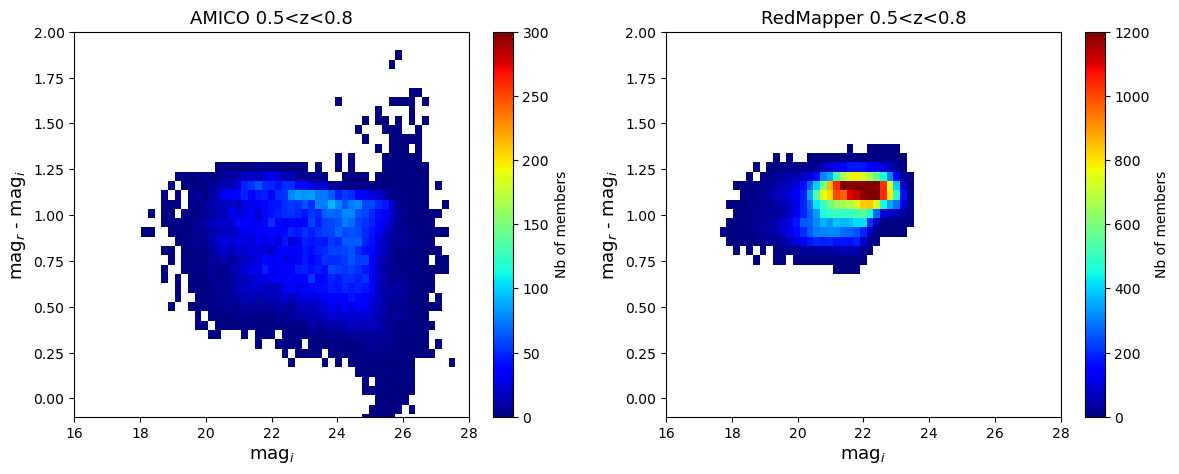

In [222]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
#print(x)
#print(y)
c = ax1.pcolormesh(x, y, am_hist.T, cmap='jet', vmin=0, vmax = 300)
ax1.set_xlabel('mag$_i$', fontsize = 13)
ax1.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
ax1.set_title('AMICO ' + str(z_min) + '<z<' + str(z_max), fontsize = 13)
c1 = ax2.pcolormesh(x, y, rm_hist.T, cmap='jet', vmin=0, vmax = 1200)
ax2.set_xlabel('mag$_i$', fontsize = 13)
ax2.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
ax2.set_title('RedMapper ' + str(z_min) + '<z<' + str(z_max), fontsize = 13)
ax1.set_xlim([16,28])
ax1.set_ylim([-.1,2])
ax2.set_xlim([16,28])
ax2.set_ylim([-.1,2])
fig.colorbar(c, ax=ax1, label = 'Nb of members')
fig.colorbar(c1, ax=ax2, label = 'Nb of members')